<a href="https://colab.research.google.com/github/Chinthapallyanjanipriya/ML_PROJECT/blob/main/OURCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries



In [ ]:
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTING dataset


In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# data visulalization

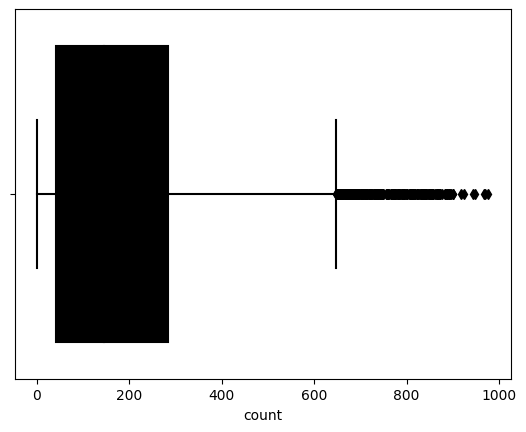

In [ ]:
sns.boxplot(x='count',data=train,color='black')
plt.show()

<ipython-input-6-c02df018f55c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'])


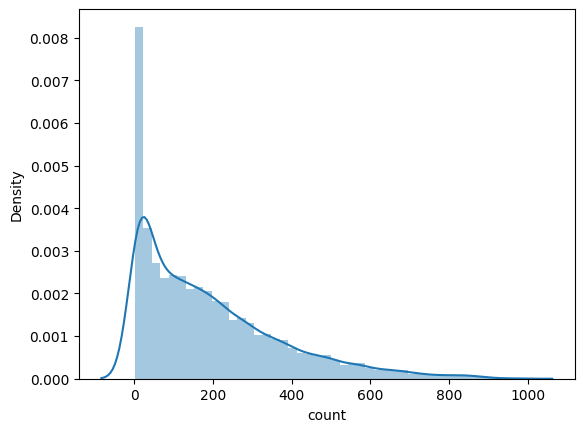

In [ ]:

sns.distplot(train['count'])
plt.show()

[Text(0.5, 0, 'weather'), Text(0, 0.5, 'count')]

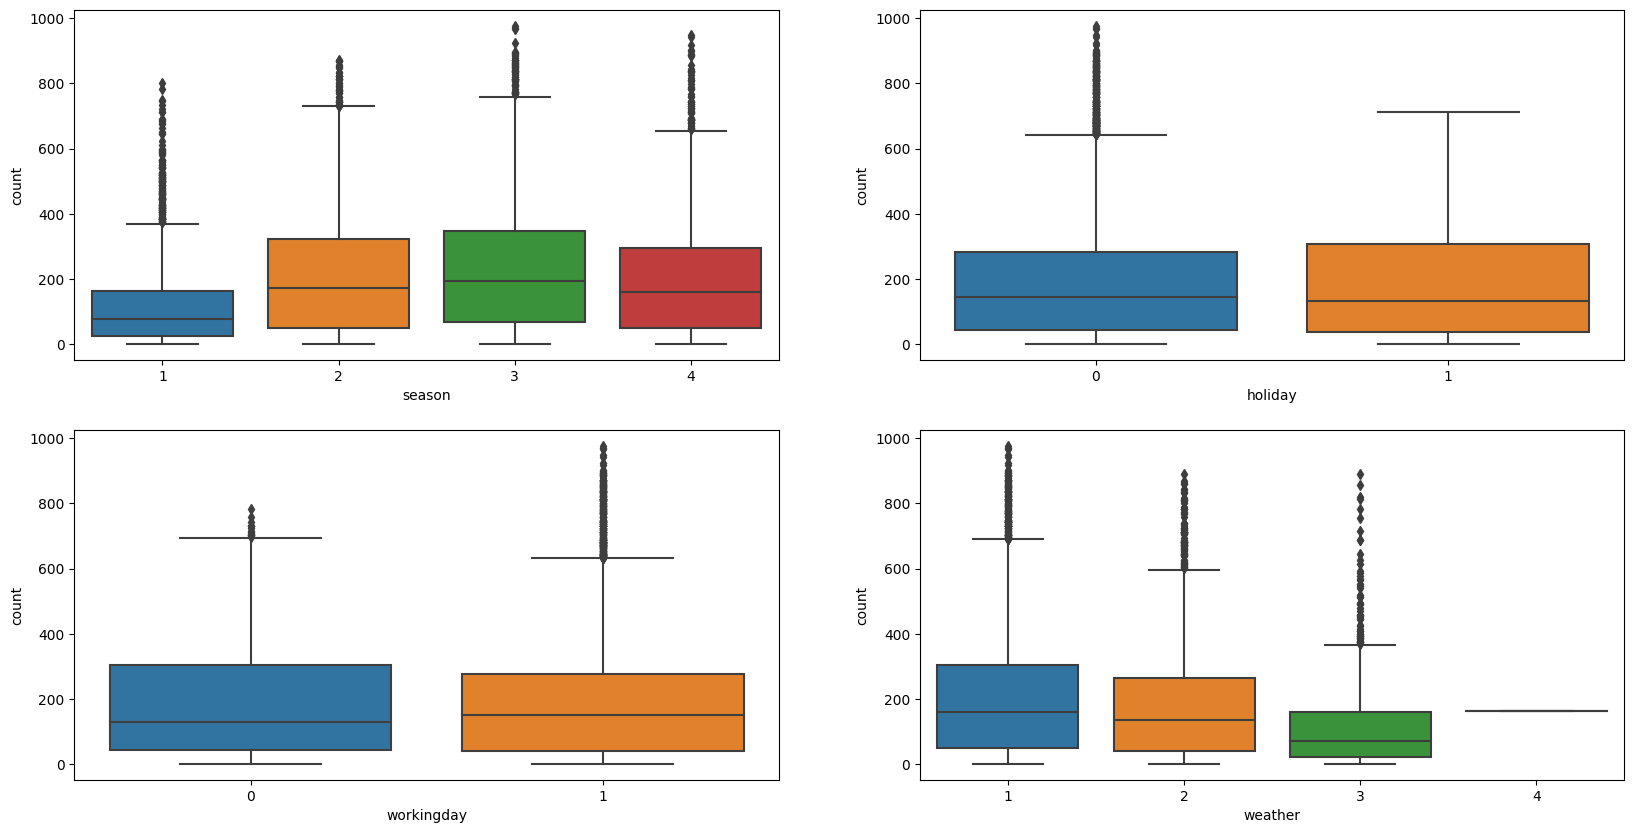

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=train,y='count',x='season',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='holiday',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='workingday',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='weather',ax=axes[1][1])

axes[0][0].set(xlabel='season',ylabel='count')
axes[0][1].set(xlabel='holiday',ylabel='count')
axes[1][0].set(xlabel='workingday',ylabel='count')
axes[1][1].set(xlabel='weather',ylabel='count')

# CREATE DATAFRAME for training and testing set



In [ ]:
train['datetime']=pd.to_datetime(train['datetime'])      
test['datetime']=pd.to_datetime(test['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
def split_datetime(df):
    df['year'] = df['datetime'].apply(lambda t: t.year)
    df['month'] = df['datetime'].apply(lambda t: t.month)
    df['day'] = df['datetime'].apply(lambda t: t.day)
    df['dayofweek'] = df['datetime'].apply(lambda t: t.dayofweek)
    df['hour'] = df['datetime'].apply(lambda t: t.hour)
    df = df.drop(['datetime'], axis=1)
    return df

In [ ]:
test = split_datetime(test)
train = split_datetime(train)
train.to_csv("train2.csv",index = False)


# data visualization

<Axes: xlabel='hour', ylabel='count'>

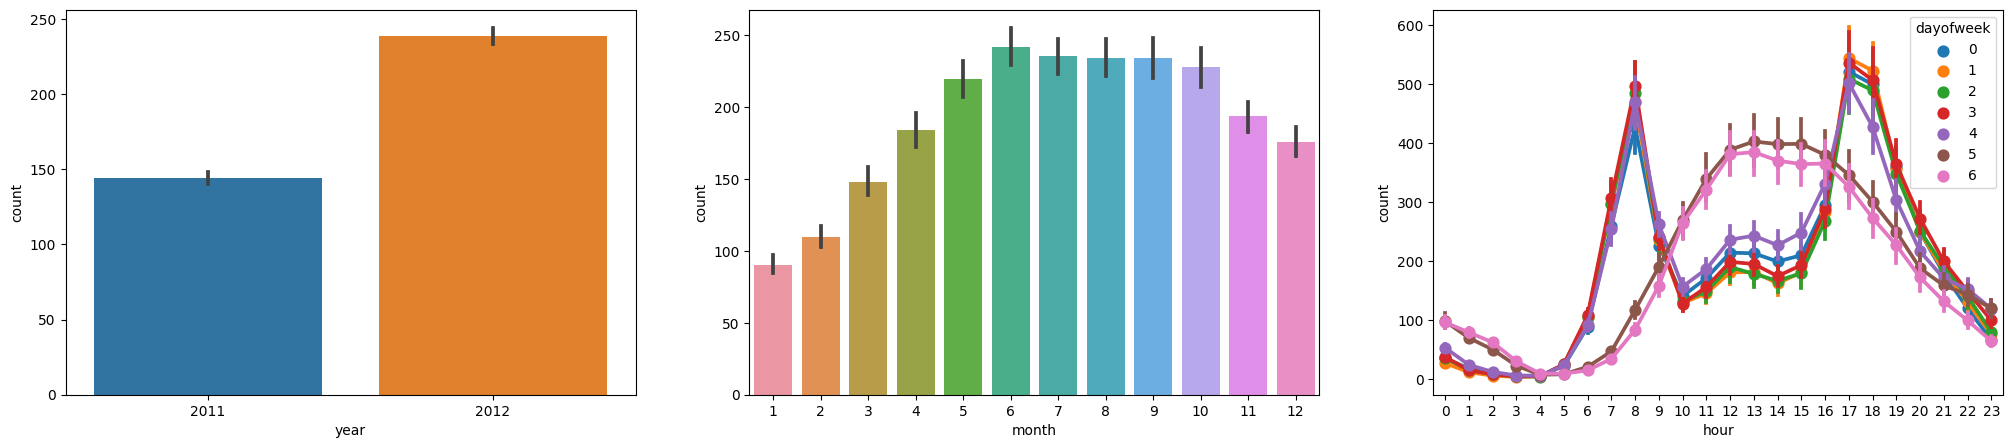

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25, 5)
sns.barplot(data=train, x='year', y=train['count'], ax=axes[0])
sns.barplot(data=train, x='month', y=train['count'], ax=axes[1])
sns.pointplot(data=train, x='hour', y=train['count'], ax=axes[2], hue='dayofweek')

data preprocessing


In [ ]:
train = train.drop(['casual', 'registered'], axis=1)   #dropping coloumns not effecting the count 

In [ ]:
train['count'] = np.log1p(train['count'])    #remove outliers and reduce skew

<ipython-input-14-4e23c8ef1650>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'],bins = 20)


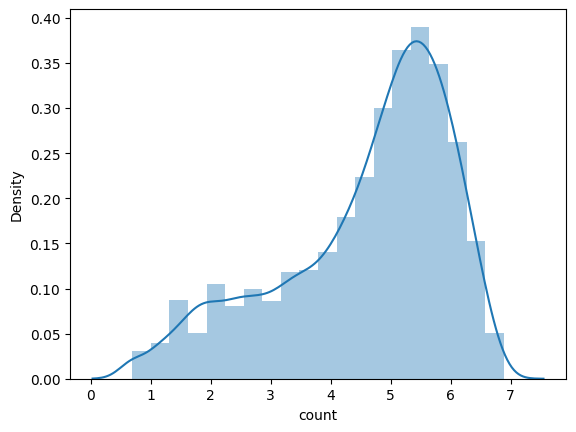

In [ ]:
sns.distplot(train['count'],bins = 20)
plt.show()

In [ ]:
train = train[np.abs(train['count']-train['count'].mean()) <= (3*train['count'].std())]
train.to_csv("train2.csv",index = False)

In [ ]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0.693147,2011,1,1,5,4


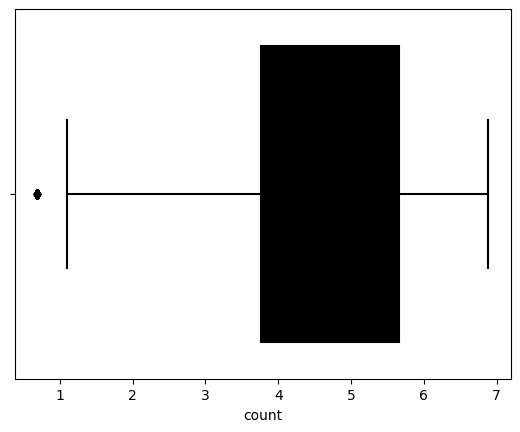

In [ ]:
sns.boxplot(x='count',data=train,color='black')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler             #fitting or scaling(floating matches)

def scaling(df):
    scaler = MinMaxScaler()
    num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

In [ ]:
train = scaling(train)
test = scaling(test)

In [ ]:
from sklearn.model_selection import train_test_split                    #split train and test
X_train, X_test, y_train, y_test = train_test_split(train.drop(['count'], axis=1), train['count'], test_size=0.3)

In [ ]:
def rmsle(y, pred):                          #root mean square log error
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# apply algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [ ]:
def evaluate(reg_cls, params=None):
    reg = reg_cls()
    if params:
        reg = GridSearchCV(reg, param_grid=params, refit=True)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    y_test_exp = np.expm1(y_test)
    pred_exp = np.expm1(pred)
    print('\n', reg_cls)
    if params:
        print(reg.best_params_)
        reg = reg.best_estimator_
    print(rmsle(y_test_exp, pred_exp))
    return reg, pred_exp

In [ ]:
lr_reg, pred_lr = evaluate(LinearRegression)
rf_reg, pred_rf = evaluate(RandomForestRegressor)
params = {'n_estimators': [100*i for i in range(1, 6)]}
xg_reg, pred_xg = evaluate(XGBRegressor, params)
lg_reg, pred_lg = evaluate(LGBMRegressor, params)


 <class 'sklearn.linear_model._base.LinearRegression'>
1.0080617338945768

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.2959276452655863

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
0.284934136941837

 <class 'lightgbm.sklearn.LGBMRegressor'>
{'n_estimators': 400}
0.2705187526817728


In [ ]:
pred=lg_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[  8.59914563   5.00236754   3.70934436 ... 144.54780779  95.15416087
  54.35040701]


# accuracy score for least error model(LGBM)

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1

array([4.86287696, 5.34275083, 2.74445976, ..., 5.94462048, 5.02535298,
       5.98631503])

In [ ]:
from sklearn.metrics import r2_score
one = r2_score(y_pred1,y_test)


In [ ]:
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2

array([6.08556358, 4.52262503, 1.74873819, ..., 5.93682038, 5.80061943,
       6.36514543])

In [ ]:
from sklearn.metrics import r2_score
two = r2_score(y_pred2,y_test)
print(two)

0.9530611591787774


In [ ]:
model3 = XGBRegressor()
model3.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred3

array([5.9582653, 4.796919 , 1.8820995, ..., 5.757719 , 5.792432 ,
       6.3110447], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score
three = r2_score(y_pred3,y_test)

In [ ]:
model4 = LGBMRegressor()
model4.fit(X_train,y_train)


LGBMRegressor()

In [ ]:
y_pred4 = model4.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
four = r2_score(y_pred4,y_test)

In [ ]:
models = []
names = ['Linear Regression' , 'RandomForest Regressor','XGBRegressor','LGBMRegressor']
scores = []
scores.append(one)
scores.append(two)
scores.append(three)
scores.append(four)
scores

[-0.04861885462297799,
 0.9530611591787774,
 0.9587123745706121,
 0.9601599498689356]

In [ ]:
models=pd.DataFrame({
    'Model':['Linear Regression' , 'RandomForest Regressor','XGBRegressor','LGBMRegressor'],
    'Score':[one,two,three,four],
    'Grid Score':[1.0314107920807773,0.3129672830020742,0.30086390040525696,0.28381146224144804]})
models.sort_values(by='Score',ascending=False)

,Model,Score,Grid Score
3,LGBMRegressor,0.960160,0.283811
2,XGBRegressor,0.958712,0.300864
1,RandomForest Regressor,0.953061,0.312967
0,Linear Regression,-0.048619,1.031411


# sample data testing

In [ ]:
submission = pd.read_csv('/content/sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [ ]:
submission.loc[:, 'count'] = pred_exp
submission.to_csv("submission.csv",index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install pandas numpy scikit-learn gradio
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 78.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 

In [ ]:
import pandas as pd
train= pd.read_csv('/content/train2.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
features = ['season','holiday',	'workingday','weather','temp'	,'atemp','humidity',	'windspeed','year','month','day','dayofweek','hour'	]
target = 'count'
X_train = train[features]
y_train = train[target]

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=100, test_size=0.25)

# Deployement

In [ ]:
import gradio as gr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load

train = pd.read_csv('/content/train2.csv')
features = ['season','holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'year', 'month', 'day','dayofweek', 'hour']
target = 'count'
X_train = train[features]
Y_train = train[target]
x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, random_state=100, test_size=0.25)
model = LGBMRegressor()
model.fit(X_train, Y_train)
dump(model, 'bicycle_count_model.joblib')

# Load the model from disk
model = load('bicycle_count_model.joblib')

def predict_count(season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, dayofweek, hour):
    # Prepare the input data
    input_data = pd.DataFrame({
        'season': [season],
        'holiday': [holiday],
        'workingday': [workingday],
        'weather': [weather],
        'temp': [temp],
        'atemp': [atemp],
        'humidity': [humidity],
        'windspeed': [windspeed],
        'year': [year],
        'month': [month],
        'day': [day],
        'dayofweek': [dayofweek],
        'hour': [hour]
    })

    # Make the prediction and return it as a string
    count = model.predict(input_data)[0]
    ans = round(count)
    return str(ans)

inputs = [
    gr.inputs.Number(label="season"),
    gr.inputs.Number(label="holiday"),
    gr.inputs.Number(label="workingday"),
    gr.inputs.Number(label="weather"),
    gr.inputs.Number(label="temp"),
    gr.inputs.Number(label="atemp"),
    gr.inputs.Number(label="humidity"),
    gr.inputs.Number(label="windspeed"),
    gr.inputs.Number(label="year"),
    gr.inputs.Number(label="month"),
    gr.inputs.Number(label="day"),
    gr.inputs.Number(label="dayofweek"),
    gr.inputs.Number(label="hour")
]

interface = gr.Interface(
    fn=predict_count,
    inputs=inputs,
    outputs=gr.outputs.Textbox(label="count"),
    title="Predicting of Bicycles count",
    layout="vertical",
    theme="compact"
)
interface.launch(debug=True, share=True)


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:528: UserWarning: Cannot load compact. Caught Exception: The space compact does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `layout` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4a3e39347fc7fd5f9d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
import tkinter as tk
import pandas as pd
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('/content/train2.csv')
features = ['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
target = 'count'
X_train = train[features]
Y_train = train[target]
x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, random_state=100, test_size=0.25)
model = RandomForestRegressor()
model.fit(X_train, Y_train)



# Define the function that predicts the count
def predict_count():
    # Get the input data
    holiday = holiday_entry.get()
    workingday = workingday_entry.get()
    weather = weather_entry.get()
    temp = temp_entry.get()
    humidity = humidity_entry.get()
    windspeed = windspeed_entry.get()
    year = year_entry.get()
    month = month_entry.get()
    day = day_entry.get()
    hour = hour_entry.get()

    # Prepare the input data
    input_data = pd.DataFrame({
        'holiday': [holiday],
        'workingday': [workingday],
        'weather': [weather],
        'temp': [temp],
        'humidity': [humidity],
        'windspeed': [windspeed],
        'year': [year],
        'month': [month],
        'day': [day],
        'hour': [hour]
    })
  
    # Make the prediction using the trained model
    count = model.predict(input_data)[0]

    # Update the count label with the predicted count
    count_label.config(text="Predicted count: {}".format(int(count)))

# Create the tkinter window
window = tk.Tk()
window.title("Bicycle Count Predictor")

# Create the input fields and labels
holiday_label = tk.Label(window, text="Holiday (0 or 1):")
holiday_entry = tk.Entry(window)
workingday_label = tk.Label(window, text="Workingday (0 or 1):")
workingday_entry = tk.Entry(window)
weather_label = tk.Label(window, text="Weather (1 to 4):")
weather_entry = tk.Entry(window)
temp_label = tk.Label(window, text="Temperature (in Celsius):")
temp_entry = tk.Entry(window)
humidity_label = tk.Label(window, text="Humidity (in %):")
humidity_entry = tk.Entry(window)
windspeed_label = tk.Label(window, text="Windspeed (in km/h):")
windspeed_entry = tk.Entry(window)
year_label = tk.Label(window, text="Year (e.g. 2011):")
year_entry = tk.Entry(window)
month_label = tk.Label(window, text="Month (1 to 12):")
month_entry = tk.Entry(window)
day_label = tk.Label(window, text="Day (1 to 31):")
day_entry = tk.Entry(window)
hour_label = tk.Label(window, text="Hour (0 to 23):")
hour_entry = tk.Entry(window)

# Create the predict button
predict_button = tk.Button(window, text="Predict", command=predict_count)

# Create the predicted count label
count_label = tk.Label(window, text="Predicted count: ")

# Add the input fields, predict button, and predicted count label to the window
holiday_label.pack()
holiday_entry.pack()
workingday_label.pack()
workingday_entry.pack()
weather_label.pack()
weather_entry.pack()
temp_label.pack()
temp_entry.pack()
humidity_label.pack()
humidity_entry.pack()
windspeed_label.pack()
windspeed_entry.pack()
year_label.pack()
year_entry.pack()
month_label.pack()
month_entry.pack()
day_label.pack()
day_entry.pack()
hour_label.pack()
hour_entry.pack()
predict_button.pack()
count_label.pack()

# Run the tkinter event loop
window.mainloop()
